In [50]:
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor

In [51]:
secret_number = bin(10)[2:]
reversed_secret_number = reversed(secret_number)
secret_number_length = len(secret_number)
secret_number_range = range(secret_number_length)

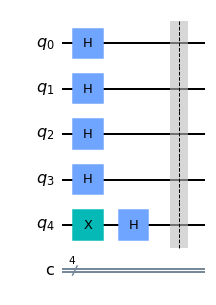

In [52]:
circuit = QuantumCircuit(secret_number_length + 1, secret_number_length)
circuit.h(secret_number_range)
circuit.x(secret_number_length)
circuit.h(secret_number_length)
circuit.barrier()
circuit.draw('mpl')

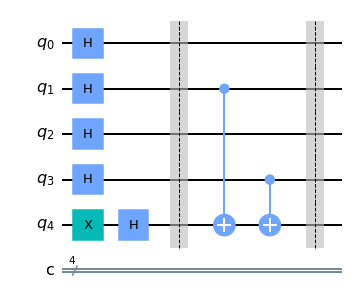

In [53]:
for pos, char in enumerate(reversed_secret_number):
    if char == '1':
        circuit.cx(pos, secret_number_length)
circuit.barrier()
circuit.draw('mpl')

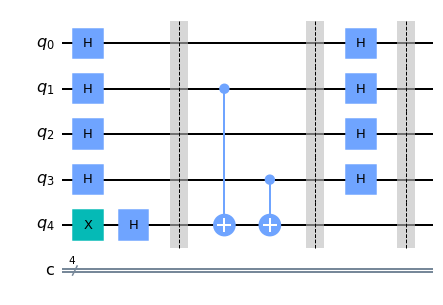

In [54]:
circuit.h(secret_number_range)
circuit.barrier()
circuit.draw('mpl')

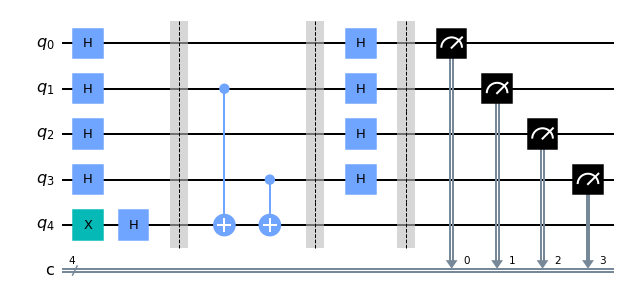

In [55]:
circuit.measure(secret_number_range, secret_number_range)
circuit.draw('mpl')

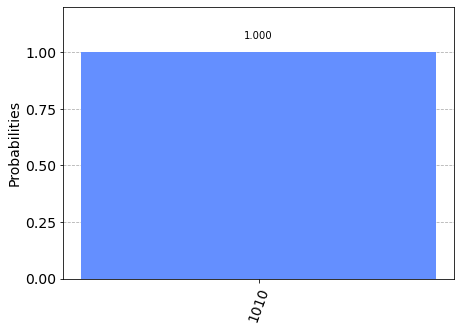

In [56]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [57]:
print(int(list(counts.keys())[0], 2))

10


In [58]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_manila')

ibmqfactory.load_account:WARNING:2022-07-23 01:17:38,362: Credentials are already in use. The existing account in the session will be replaced.


In [65]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

62db3166bf166ebf64c33fa5
Job Status: job has successfully run


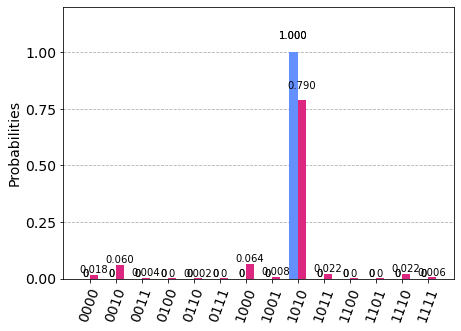

In [66]:
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram([counts, device_counts])